## Forecasting Timeseries Data Using Facebook FbProphet
### Steps required with fbprophet
- Introduction And Insatllation
- Data preprocessing With TIme Series
- Model fitting
- Obtaining The Forecasts
- Plotting The Forecasts
- Cross Validation
- Computing Performance Metrics
- Visualize the Performance Metrics
- Conclusion

In [1]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/monthly-milk-production-pounds.csv')

In [7]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [9]:
df.drop(168, axis=0, inplace=True)

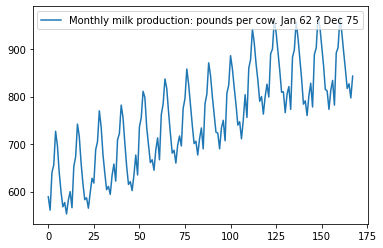

In [10]:
df.plot()

In [13]:
df.columns = ["ds", "y"]

In [14]:
df.ds = pd.to_datetime(df['ds'])

In [15]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [17]:
## shifting to make it stationary
df['y'] = df['y'] - df['y'].shift(1)

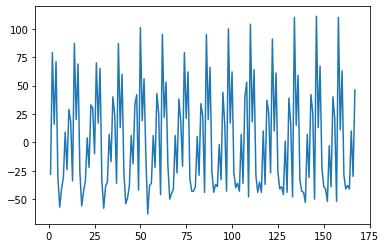

In [18]:
df['y'].plot()

In [19]:
from fbprophet import Prophet

In [20]:
### initialize the model
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [22]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [24]:
### Create Future dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

In [25]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [26]:
## Predictions
prediction = model.predict(future_dates)

In [27]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,2.043737,17.637379,36.099876,2.043737,2.043737,24.994757,24.994757,24.994757,24.994757,24.994757,24.994757,0.0,0.0,0.0,27.038494
1,1962-02-01,2.042025,-48.099602,-29.189865,2.042025,2.042025,-40.255747,-40.255747,-40.255747,-40.255747,-40.255747,-40.255747,0.0,0.0,0.0,-38.213722
2,1962-03-01,2.040479,85.983431,104.374640,2.040479,2.040479,93.020043,93.020043,93.020043,93.020043,93.020043,93.020043,0.0,0.0,0.0,95.060522
3,1962-04-01,2.038768,6.515753,25.308707,2.038768,2.038768,14.325207,14.325207,14.325207,14.325207,14.325207,14.325207,0.0,0.0,0.0,16.363974
4,1962-05-01,2.037111,52.866001,71.722707,2.037111,2.037111,60.542390,60.542390,60.542390,60.542390,60.542390,60.542390,0.0,0.0,0.0,62.579502


In [29]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,12.854927,3.669779,21.756282
529,1976-11-27,18.301889,9.064915,27.450265
530,1976-11-28,23.881751,14.731845,33.417887
531,1976-11-29,29.481994,19.596396,38.509846
532,1976-11-30,34.984225,25.786397,45.023471


In [30]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,27.038494,17.637379,36.099876
1,1962-02-01,-38.213722,-48.099602,-29.189865
2,1962-03-01,95.060522,85.983431,104.374640
3,1962-04-01,16.363974,6.515753,25.308707
4,1962-05-01,62.579502,52.866001,71.722707


### Plotting the Forecasts
- Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph repesents the predicted values while the black dots represents the data in our dataset

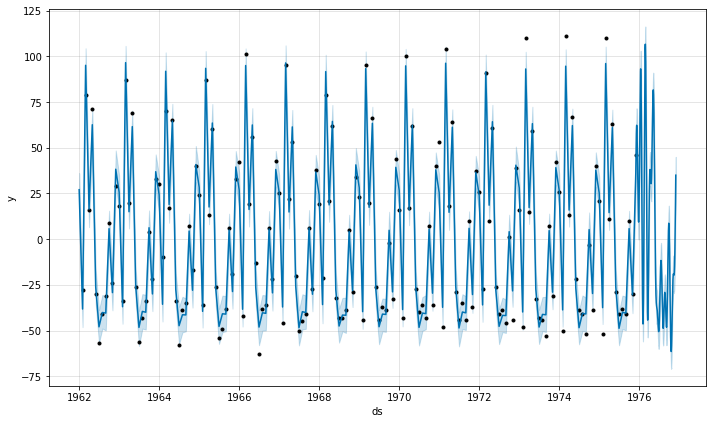

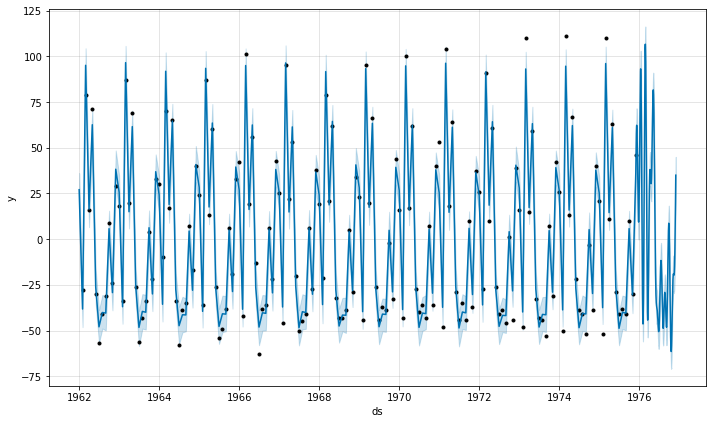

In [31]:
## plot the predicted projection
model.plot(prediction)

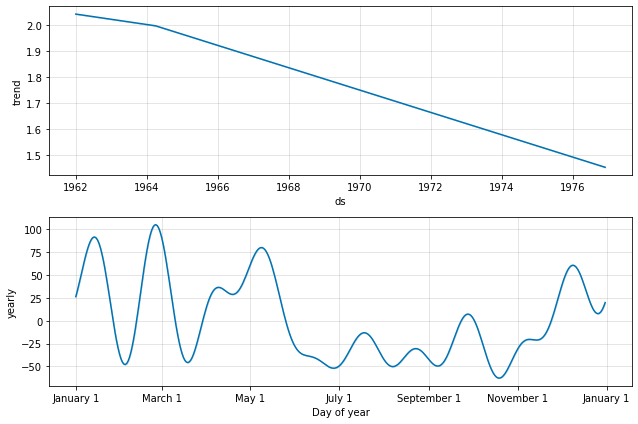

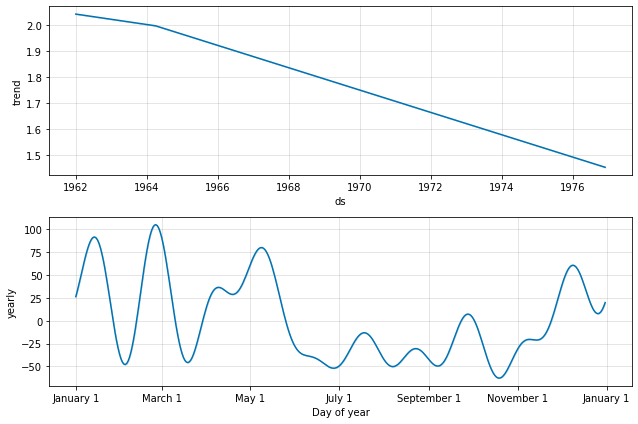

In [32]:
### visualize each components [Trends, Weekly]
model.plot_components(prediction)

### Cross validation
- Next let's measure the forecast error using the historical data. We'll do this by comparing the predicted values with actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data cut off point. Afterwards we compare the actual values to the predicted valeus. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:
1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [33]:
from fbprophet.diagnostics import cross_validation

In [36]:
df_cv =  cross_validation(model, horizon="365 days", period="180 days", initial="1095 days")

INFO:fbprophet:Making 20 forecasts with cutoffs between 1965-07-21 00:00:00 and 1974-12-01 00:00:00


In [37]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898372,-46.209929,-34.926392,-49.0,1965-07-21
1,1965-09-01,-34.869323,-40.596155,-29.374470,-38.0,1965-07-21
2,1965-10-01,6.103171,0.368841,11.282712,6.0,1965-07-21
3,1965-11-01,-20.281526,-25.527087,-15.079343,-19.0,1965-07-21
4,1965-12-01,36.035431,30.366989,41.782515,33.0,1965-07-21


In [38]:
from fbprophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)

In [39]:
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,123.770852,11.125235,9.160739,0.263184,0.196639,0.458333
1,42 days,115.513644,10.747727,8.600056,0.233072,0.185216,0.541667
2,43 days,123.586976,11.116968,8.837566,0.226524,0.185216,0.541667
3,46 days,89.586428,9.465011,7.889120,0.213582,0.185216,0.583333
4,47 days,87.148284,9.335325,7.677113,0.209829,0.171733,0.604167


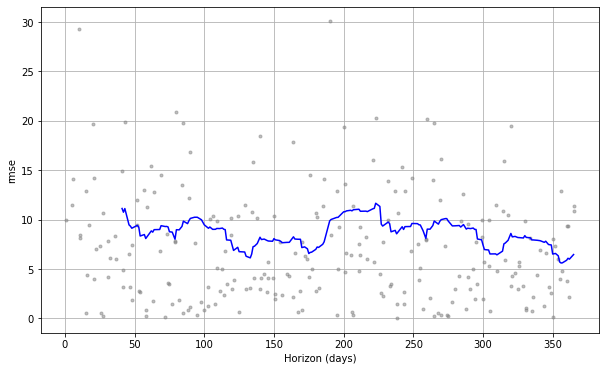

In [40]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')